In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("crime_data.csv")

In [3]:
df.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
df=df.rename(columns={"Unnamed: 0":"state"})

In [6]:
df.drop("state",inplace=True,axis=1)

In [7]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [10]:
df1=df.copy()

In [11]:
df1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [9]:
df1.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


# Normalizing data

- Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
# Normalization function
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
df_norm=pd.DataFrame(trans.fit_transform(df1.iloc[:,1:]))
df_norm.head()

,0,1,2
0,0.654110,0.440678,0.359173
1,0.746575,0.271186,0.961240
2,0.852740,0.813559,0.612403
3,0.496575,0.305085,0.315245
4,0.791096,1.000000,0.860465


# Dendrogram

In [15]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

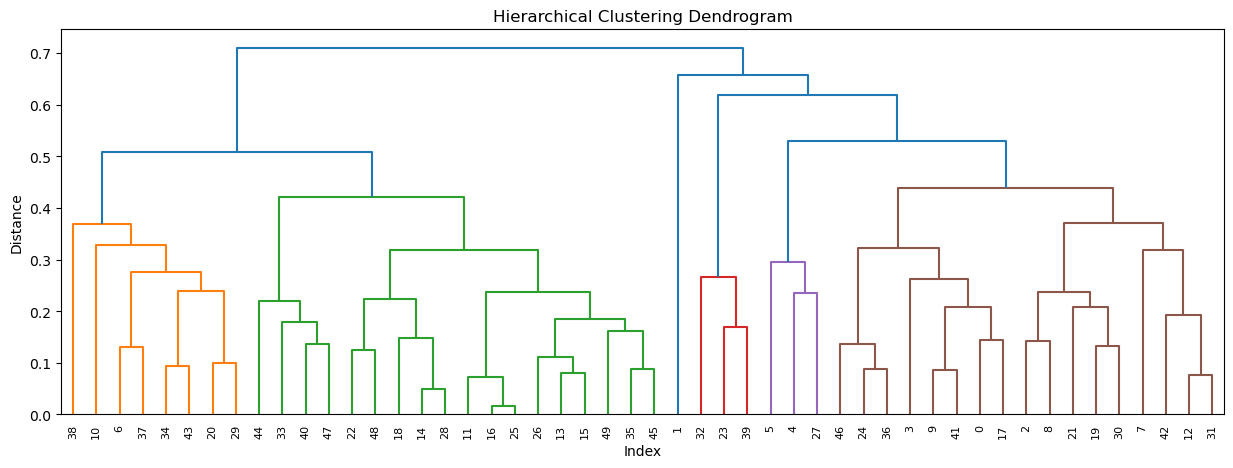

In [16]:
Average = linkage (df_norm, method="average",metric="euclidean")
plt.figure (figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(Average)
plt.show()

In [28]:
#-----CLUSTER 1-----|-------------CLUSTER 2-------------------|3|---4--|--5---|-CLUSTER 6--------|-------CLUSTER 7------

In [36]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings ('ignore')
hc=AgglomerativeClustering (n_clusters=6, linkage='average', affinity = "euclidean").fit(df_norm)

cluster_labels=pd.Series (hc.labels_)
cluster_labels
df1['clust_average']=cluster_labels # creating a new column and assigning it to new column
df1

,Murder,Assault,UrbanPop,Rape,clust_average
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,5
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,4
5,7.9,204,78,38.7,4
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [37]:
data=df1[(df1.clust_average==0)]
data

,Murder,Assault,UrbanPop,Rape,clust_average
0,13.2,236,58,21.2,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0
12,10.4,249,83,24.0,0
17,15.4,249,66,22.2,0
19,11.3,300,67,27.8,0
21,12.1,255,74,35.1,0


In [38]:
data=df1[(df1.clust_average==1)]
data

,Murder,Assault,UrbanPop,Rape,clust_average
11,2.6,120,54,14.2,1
13,7.2,113,65,21.0,1
14,2.2,56,57,11.3,1
15,6.0,115,66,18.0,1
16,9.7,109,52,16.3,1
18,2.1,83,51,7.8,1
22,2.7,72,66,14.9,1
25,6.0,109,53,16.4,1
26,4.3,102,62,16.5,1
28,2.1,57,56,9.5,1


In [39]:
data=df1[(df1.clust_average==2)]
data

,Murder,Assault,UrbanPop,Rape,clust_average
6,3.3,110,77,11.1,2
10,5.3,46,83,20.2,2
20,4.4,149,85,16.3,2
29,7.4,159,89,18.8,2
34,7.3,120,75,21.4,2
37,6.3,106,72,14.9,2
38,3.4,174,87,8.3,2
43,3.2,120,80,22.9,2


In [40]:
data=df1[(df1.clust_average==3)]
data

,Murder,Assault,UrbanPop,Rape,clust_average
23,16.1,259,44,17.1,3
32,13.0,337,45,16.1,3
39,14.4,279,48,22.5,3


In [41]:
data=df1[(df1.clust_average==4)]
data

,Murder,Assault,UrbanPop,Rape,clust_average
4,9.0,276,91,40.6,4
5,7.9,204,78,38.7,4
27,12.2,252,81,46.0,4


In [42]:
df1.iloc[:,1:].groupby(df1.clust_average).mean()

,Assault,UrbanPop,Rape,clust_average
clust_average,,,,
0,233.352941,70.294118,26.388235,0.0
1,95.388889,55.500000,14.088889,1.0
2,123.000000,81.000000,16.737500,2.0
3,291.666667,45.666667,18.566667,3.0
4,244.000000,83.333333,41.766667,4.0
5,263.000000,48.000000,44.500000,5.0


# Exploring hierarchical Clustering

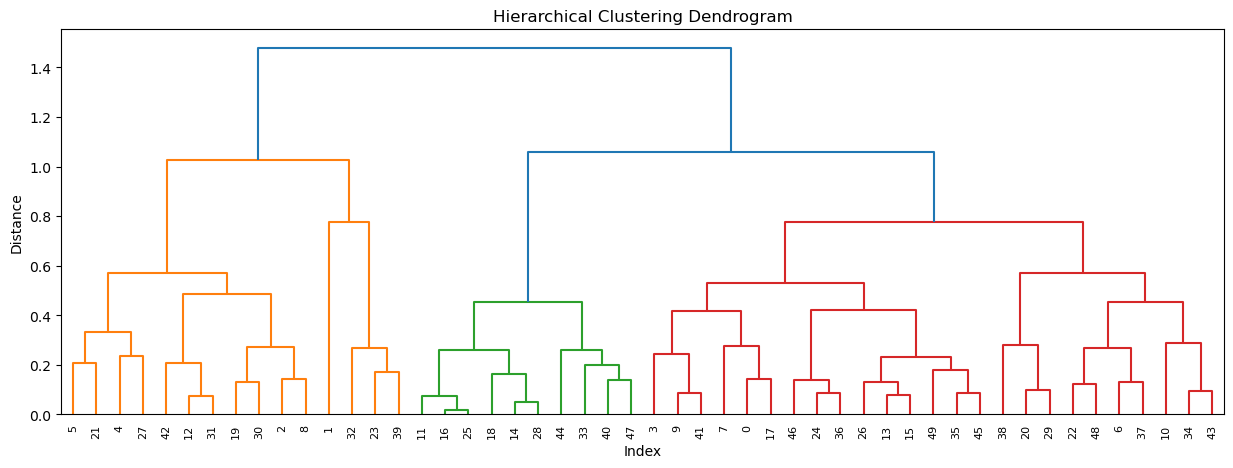

In [43]:
complete = linkage (df_norm, method="complete",metric="euclidean")
plt.figure (figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(complete)
plt.show()

In [44]:
hc1=AgglomerativeClustering (n_clusters=5, linkage='complete', affinity = "euclidean").fit(df_norm)
cluster1_labels=pd.Series (hc1.labels_)
cluster1_labels
df1['clust_complete']=cluster1_labels
df1

,Murder,Assault,UrbanPop,Rape,clust_average,clust_complete
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,5,4
2,8.1,294,80,31.0,0,1
3,8.8,190,50,19.5,0,0
4,9.0,276,91,40.6,4,1
5,7.9,204,78,38.7,4,1
6,3.3,110,77,11.1,2,0
7,5.9,238,72,15.8,0,0
8,15.4,335,80,31.9,0,1
9,17.4,211,60,25.8,0,0


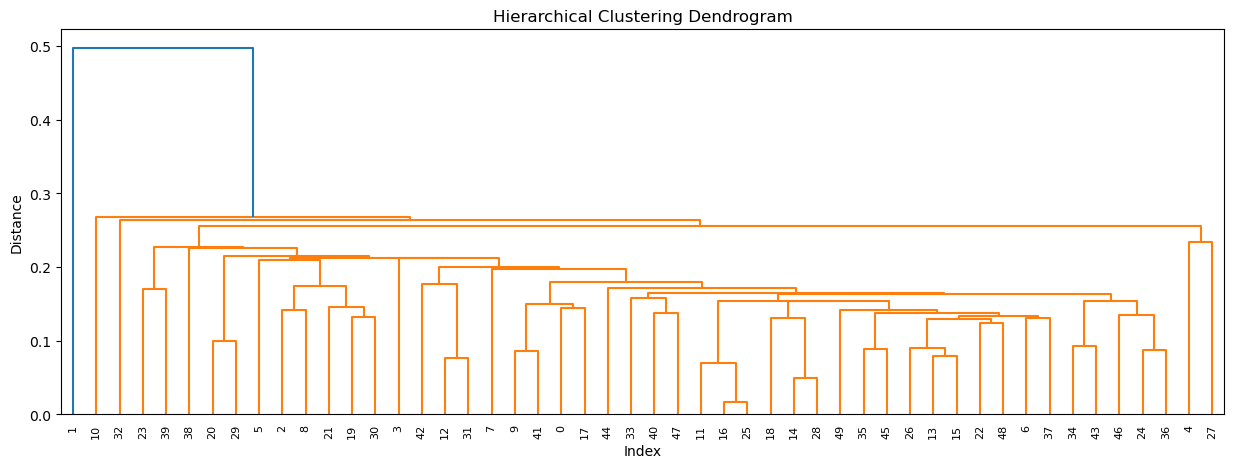

In [45]:
single = linkage (df_norm, method="single",metric="euclidean")
plt.figure (figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(single)
plt.show()

In [46]:
#complicated dendogram
#hc2=AgglomerativeClustering (n_clusters=5, linkage='single', affinity = "euclidean").fit(df_norm)
#cluster2_labels=pd.Series (hc2.labels_)
#cluster2_labels
#df1['clust_single']=cluster2_labels
#df1

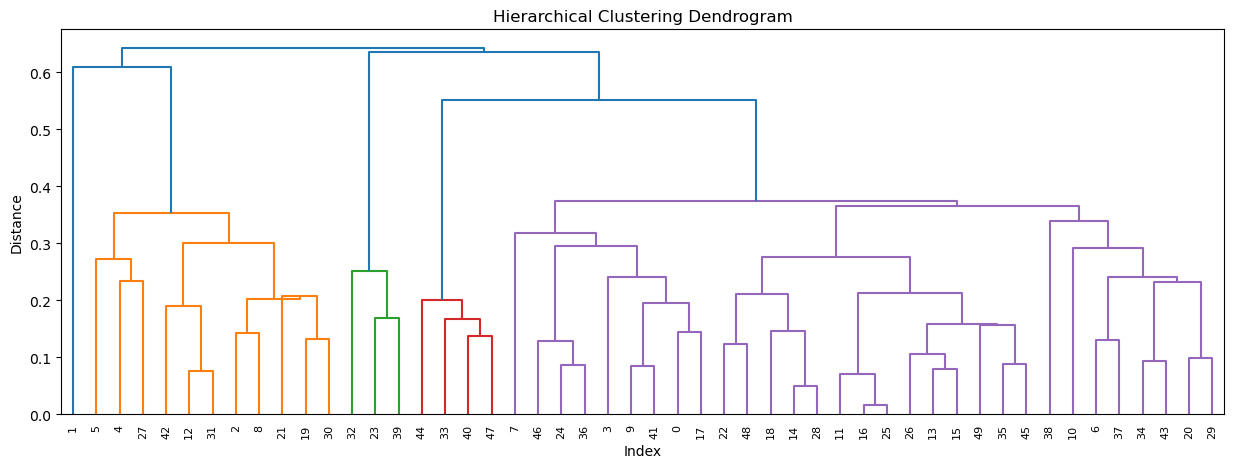

In [47]:
centroid= linkage (df_norm, method="centroid",metric="euclidean")
plt.figure (figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(centroid)
plt.show()

In [48]:
hc3=AgglomerativeClustering (n_clusters=6, linkage='ward', affinity = "euclidean").fit(df_norm)
cluster3_labels=pd.Series (hc3.labels_)
cluster3_labels
df1['clust_ward']=cluster3_labels
df1

,Murder,Assault,UrbanPop,Rape,clust_average,clust_complete,clust_ward
0,13.2,236,58,21.2,0,0,0
1,10.0,263,48,44.5,5,4,1
2,8.1,294,80,31.0,0,1,2
3,8.8,190,50,19.5,0,0,0
4,9.0,276,91,40.6,4,1,1
5,7.9,204,78,38.7,4,1,1
6,3.3,110,77,11.1,2,0,3
7,5.9,238,72,15.8,0,0,0
8,15.4,335,80,31.9,0,1,2
9,17.4,211,60,25.8,0,0,0


# From the above linkage visualization complete linkage works out to be better model with better understanding of dendogram. We can stop here due to small amount of data Hierarchical clustering method is enough to cluster it.

# KMeans

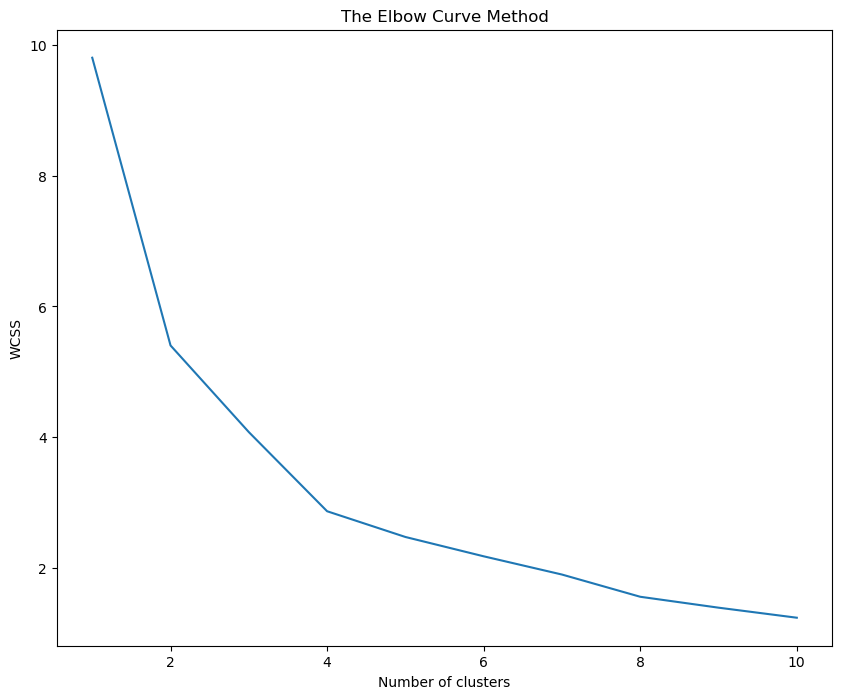

In [50]:
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(10,8))
WCSS=[] #empty list for wcss values 
for i in range(1,11):
    clf=KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_)
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Curve Method')
plt.ylabel('WCSS')
plt.xlabel('Number of clusters')
plt.show()

In [95]:
clf=KMeans(n_clusters=5)
y_kmeans=clf.fit_predict(df_norm)

In [96]:
y_kmeans

array([1, 2, 2, 1, 2, 2, 4, 1, 2, 1, 4, 0, 2, 1, 0, 4, 0, 1, 0, 2, 4, 2,
       0, 3, 1, 0, 0, 2, 0, 4, 2, 2, 3, 0, 4, 1, 1, 4, 4, 3, 0, 1, 1, 4,
       0, 1, 1, 0, 0, 1])

In [97]:
clf.labels_

array([1, 2, 2, 1, 2, 2, 4, 1, 2, 1, 4, 0, 2, 1, 0, 4, 0, 1, 0, 2, 4, 2,
       0, 3, 1, 0, 0, 2, 0, 4, 2, 2, 3, 0, 4, 1, 1, 4, 4, 3, 0, 1, 1, 4,
       0, 1, 1, 0, 0, 1])

In [98]:
clf.cluster_centers_

array([[0.11485774, 0.34028683, 0.12601868],
       [0.4760274 , 0.56053269, 0.39811739],
       [0.76961395, 0.74884438, 0.69884895],
       [0.84474886, 0.23163842, 0.29112834],
       [0.26407915, 0.80225989, 0.2474878 ]])

In [99]:
clf.inertia_

2.4663909704227867

In [100]:
md=pd.Series(y_kmeans) # converting numpy array into pandas series object
df1['KM_clust']=md
df1.head()

,Murder,Assault,UrbanPop,Rape,clust_average,clust_complete,clust_ward,KM_clust
0,13.2,236,58,21.2,0,0,0,1
1,10.0,263,48,44.5,5,4,1,2
2,8.1,294,80,31.0,0,1,2,2
3,8.8,190,50,19.5,0,0,0,1
4,9.0,276,91,40.6,4,1,1,2


Text(0.5, 1.0, 'Clusters using Kmeans')

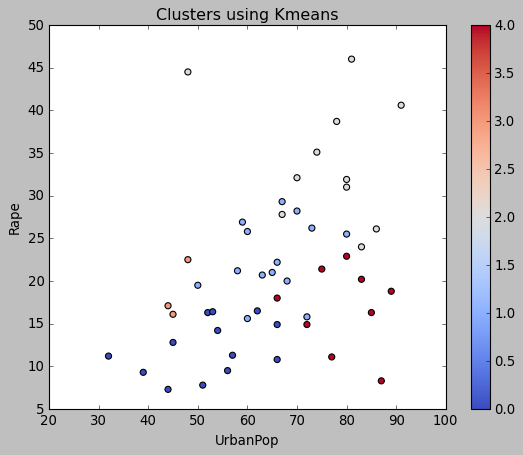

In [101]:
plt.style.use(['classic'])
df1.plot(x='UrbanPop',y='Rape',c=clf.labels_,kind='scatter',s=30,cmap=plt.cm.coolwarm)
plt.title('Clusters using Kmeans')

# DBScan

In [102]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [104]:
df2=df.copy()

In [132]:
df2.head()

,Murder,Assault,UrbanPop,Rape,cluster_outliear
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0


In [105]:
stscaler=StandardScaler().fit(df2)
df2_z=stscaler.transform(df2)
df2_z

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [149]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(df2_z)

DBSCAN(eps=2)

In [150]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [151]:
df2['cluster_outliear']=dbscan.labels_

In [152]:
df2

,Murder,Assault,UrbanPop,Rape,cluster_outliear
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


# -1 indicates outliers. In this no outliers.

# Silhouette score

In [153]:
dl=dbscan.labels_

In [154]:
import sklearn
sklearn.metrics.silhouette_score(df2_z,dl)

0.23455598753159795

In [155]:
clf1=KMeans(n_clusters=3)
y_Kmeans1=clf.fit_predict(df2_z)

In [156]:
y_Kmeans1

array([0, 3, 3, 2, 3, 3, 4, 4, 3, 0, 4, 1, 3, 2, 1, 2, 2, 0, 1, 3, 4, 3,
       1, 0, 2, 1, 1, 3, 1, 4, 3, 3, 0, 1, 2, 2, 2, 4, 4, 0, 1, 0, 3, 4,
       1, 2, 2, 1, 1, 2])

In [157]:
sklearn.metrics.silhouette_score(df2_z,y_Kmeans1)

0.3062295123951626

# Kmean model is better and works better on small dataset. and no outliers